# Pymaceuticals Inc.
---

### Analysis

- First, I think that the data we plotted does not tell a story about the relative success of these drugs. It's hard to make an analysis when we have plots of M vs F and the number of timepounts for the data. Lastly, when I looked at the data to see final tumor volumes, some of them had continued to grow and some had shrunk. Therefore, we should have looked at the difference between the starting volume mass (which were ALL 45) and the final volume. Then we should have grouped the mean, etc, of the DIFFERENCES into drug regimens and compared the drugs that way. This would have resulted in relevent information to the analyze. The only true relevant plot we made is the box plot, at least for drug comparisons. This shows the final tumor volume, but it would have been more interesting to compare the two best performing drugs and find which works faster and which has a better shrinking rate, which the volume vs time plot would be useful.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_outer = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table for preview
merged_outer.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice. 249
merged_outer['Mouse ID'].nunique()


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_tp=merged_outer.loc[merged_outer.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_tp

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_data = merged_outer.loc[merged_outer["Mouse ID"] == "g989"]
g989_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
mask = merged_outer['Mouse ID'] != "g989"
masked_df = merged_outer[mask]
masked_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = merged_outer['Mouse ID'] != "g989"
masked_df = merged_outer[mask]
masked_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice in the clean DataFrame.
masked_df['Mouse ID'].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_table = masked_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
stat_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

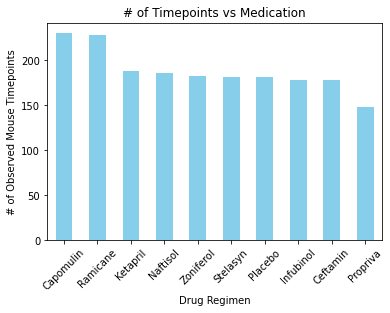

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
rows = masked_df['Drug Regimen'].value_counts()
rows.plot(kind='bar', color='skyblue')
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("# of Timepoints vs Medication")
plt.show()

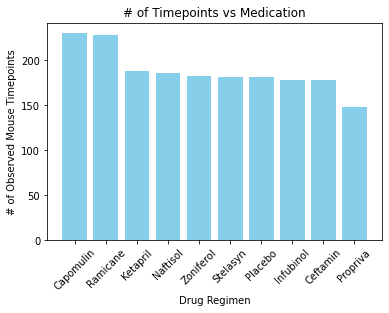

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(rows.index.values,rows.values, color = "skyblue")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("# of Timepoints vs Medication")
plt.show()

<AxesSubplot:ylabel='Sex'>

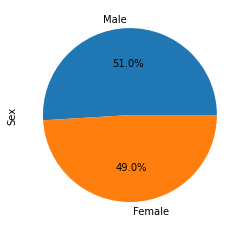

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_dist = masked_df.Sex.value_counts()
sex_dist.plot.pie(y = 'Sex', autopct='%1.1f%%')

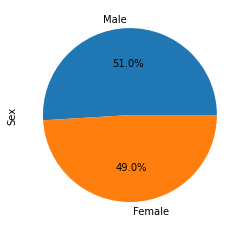

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_dist.values,labels=sex_dist.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_time = masked_df.groupby(["Mouse ID"])['Timepoint'].max().reset_index()
max_time

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
time_df = max_time.merge(masked_df,on=['Mouse ID','Timepoint'],how="left") #outer has 1180 rows
time_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
meds = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Loop through each drug in the treatment list, locating the rows in the merged DataFrame 
# that correspond to each treatment. Append the resulting final tumor volumes for each drug to the empty list.
# Determine outliers by using the upper and lower bounds, and then print the results.

for med in meds:
    final_vol = time_df.loc[time_df["Drug Regimen"] == med, 'Tumor Volume (mm3)']
    vol.append(final_vol)
    quart = final_vol.quantile([.25,.5,.75])
    low = quart[0.25]
    up = quart[0.75]
    iqr = up-low
    low_b = low - (1.5*iqr)
    up_b = up + (1.5*iqr)
    outliers = final_vol.loc[(final_vol < low_b) | (final_vol > up_b)]
    print(f"{med}: {outliers}")
    
    

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


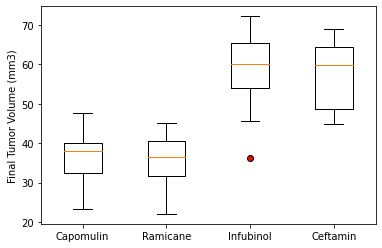

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(vol, labels = meds,flierprops=dict(markerfacecolor='red'))
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

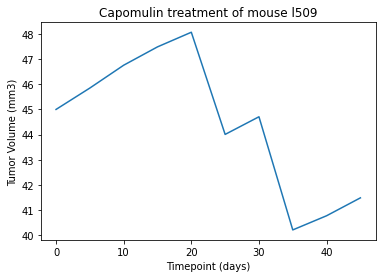

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
cap_df = masked_df.loc[masked_df['Drug Regimen'] == "Capomulin"]
cap_mouse = cap_df.loc[cap_df['Mouse ID']== 'l509']
plt.plot(cap_mouse['Timepoint'],cap_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

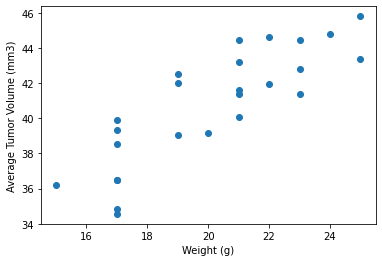

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_ave = cap_df.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
x = cap_ave['Weight (g)']
y = cap_ave['Tumor Volume (mm3)']
plt.scatter(x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

0.84


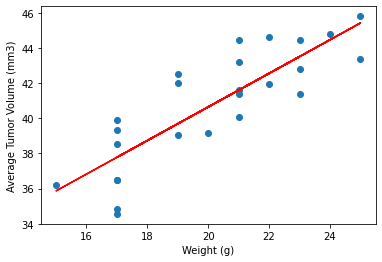

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
cor, p_v = st.pearsonr(x, y)
cor2 = round(cor, 2)
print(cor2)
plt.scatter(x,y)
m, b, r, p_v, std_err = st.linregress(x, y)
plt.plot(x, m*x+b, color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()